## Problem

In Chapter 18 of *Principles of Economics*, Gottheil describes income distribution and poverty. He says, "People who supply highly productive labor, capital, land, and entrepreneurial talent to the market earn higher incomes. Conversely, many people at the bottom of the income distribution are less productive and earn lower incomes as a result." He goes on to describe that the "extent of inequality in the income distribution can be measured with the Lorenz curve...".

In this problem, you are going to create and interpret **Lorenz curves** for different populations, including the U.S. at different decades.

## Introduction

The Lorenz curve is a way to visualize income distribution in an economy. It is perhaps easiest to describe it using an example with *fictitious* data.

Population Quintile | Percentage of Total Income Received
 :---: | :---: 
Poorest 20% | 12
Second 20% | 16
Third 20% | 20
Fourth 20% | 24
Richest 20% | 28

**Quintile** refers to a percentage of the population that is broken into 5 parts of equal numbers of people. Here, are the quintiles:

- *Poorest* or *First* is the lowest 20% of the population in terms of income. They earn 12% of the economy's total income.
- *Second* is the second lowest 20% of the population in terms of income. They earn 16% of the economy's total income.
- *Third* is the middle 20% of the population (40% of the population is below them and 40% of the population is above them). They earn 20% of the economy's total income.
- *Fourth* is the second highest 20% of the population (60% of the population is below them and 20% of the population is above them). They earn 24% of the economy's total income.
- *Richest* or *Fifth* is the highest 20% of the population. They earn 28% of the economy's total income.

Let's transform this data into two variables: (1) population (%) and (2) income (%). Income will be the dependent variable and population will be the independent variable. To get the population, we add the total population up through the given quintile. To get the total income, we add the total income up through the given quntile. Thus, for the data given for this economy above, we have:

Population (%) | Income (%)
 :--- | :--- 
20 | 12
40 (=20+20) | 28 (=12+16)
60 (=20+20+20) | 48 (=12+16+20)
80 (=20+20+20+20) | 72 (=12+16+20+24)
100 (=20+20+20+20+20) | 100 (=12+16+20+24+28)

Here's the data table written more clearly without the calculations.

Population (%) | Income (%)
 :---: | :---: 
20 | 12
40 | 28 
60  | 48 
80  | 72 
100  | 100 

A graph of Income (%) as a function of Population (%) is called a **Lorenz curve**.

#### Perfect Income Equality

In an economy with *perfect equality* (perfect in a mathematical sense, not necessarily a social sense), every person has exactly the same income. Then the data for the quintiles is:

Population Quintile | Percentage of Total Income Received
 :---: | :---: 
Poorest 20% | 20
Second 20% | 20
Third 20% | 20
Fourth 20% | 20
Richest 20% | 20

I consider this to be a *flat* economy. But if we transform the data to show percentage of total population and percentage of total income, it looks like this:

Population (%) | Income (%)
 :---: | :---: 
20 | 20
40 | 40 
60  | 60 
80  | 80 
100  | 100 


## Exercise 1

1.  The file `income-data.txt` contains the data described above, for both the perfectly equal economy and the example economy. Read the file `income-data.txt` into a dataframe and print the first five rows of data. This will help you see the headings (names) of the columns of data. The data should match what you see in the data tables above.

2. Make a Lorenz curve for an economy with perfect income equality. In other words, plot the income as a function of the population for the economy with perfect income equality. In your plot, connect the data points and make it blue. (Do **not** do a curve fit since for perfect income equality, slope=1 and intercept=0, exactly.)

3. On the same graph, also plot the income as a function of the population for the sample economy and make it a different color than blue. Use a large marker of some kind for the data points. Include a legend to describe each plot.

1. By comparing the two graphs, you can see how an unequal income distribution compares to an equal income distribution. Describe how one can look at a Lorenz curve for an economy and know whether the economy is close to having perfect income equality or is "very unequal" in income distribution.

1. For the data of income vs. population for the sample economy, do a quadratic curve fit of the form

  $$I = a_0 + a_1P + a_2P^2$$

  where $I$ is the percentage of income and $P$ is the percentage of population. Print the coefficients. Plot both the data and the best-fit quadratic curve on the same graph.

1. Use your graph to answer the following question. What percentage of the population has 90% of the income?


In [1]:
import pandas as pd #used to read data
import numpy as np #used for numerical operation
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

In [2]:
df = pd.read_table('income-data.txt')
df.head()

,Population (%),Income (%) for Perfect Equality,Income (%) for Sample Economy
0,0,0,0
1,20,20,12
2,40,40,28
3,60,60,48
4,80,80,72


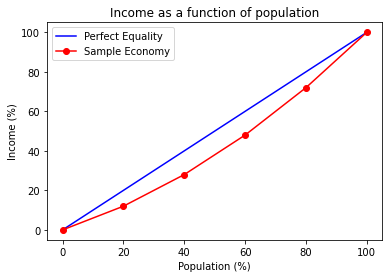

In [3]:
pop_data = df['Population (%)']
income_data_perfect = df['Income (%) for Perfect Equality']
income_data_sample = df['Income (%) for Sample Economy']

plt.title('Income as a function of population')
plt.xlabel('Population (%)')
plt.ylabel('Income (%)')
plt.plot(pop_data,income_data_perfect,'b-',label='Perfect Equality') # syntax is (horizontal data , vertical data)
plt.plot(pop_data,income_data_sample,'ro-',label='Sample Economy') # syntax is (horizontal data , vertical data)
plt.legend(loc='upper left')
plt.show()

A population with perfectly equal income will have a Lorenz curve that is a straight line with slope = 1. If the income is not equal, the curve will have an increasing slope, starting out with a small slope and increasing in steepness. That is, the unequal income Lorenz curve will curve upward, with data points below the perfect equality line.

The best-fit parameters are: a_0=1.518046e-24, a_1=5.000000e-01, a_2=5.000000e-03.


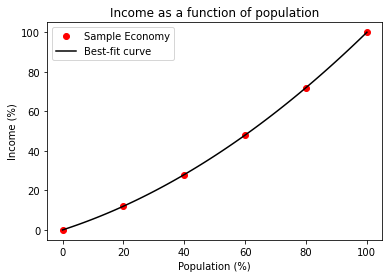

In [4]:
def quadratic(P, a_0, a_1, a_2):
    I = a_0 + a_1*P + a_2*P**2
    return I

params, stats = curve_fit(quadratic, pop_data, income_data_sample)

a_0 = params[0]
a_1 = params[1]
a_2 = params[2]
print("The best-fit parameters are: a_0={:e}, a_1={:e}, a_2={:e}.".format(a_0, a_1, a_2))

Pmodel = np.linspace(0,100,100)
Imodel = quadratic(Pmodel, a_0, a_1, a_2)

fig = plt.figure()
plt.title('Income as a function of population')
plt.xlabel('Population (%)')
plt.ylabel('Income (%)')
#plt.plot(pop_data,income_data_perfect,'b-',label='Perfect Equality') # syntax is (horizontal data , vertical data)
plt.plot(pop_data,income_data_sample,'ro',label='Sample Economy') # syntax is (horizontal data , vertical data)
plt.plot(Pmodel,Imodel,'k-',label='Best-fit curve') # syntax is (horizontal data , vertical data)
plt.legend(loc='upper left')
plt.show()

93% of the population has 90% of the income. That implies that 7% of the population has the other 10% of the income.

---------------

## Exercise 2

Here is income data for the U.S. in 1970, 1980, 1990, 2000, and 2010. The last column shows perfect income equality as a reference.

Population (%) | Income (%) 1970 | Income (%) 1980 | Income (%) 1990 | Income (%) 2000 | Income (%) 2010 | Income (%) Perfect Income Equality |
:---: | :---: | :---: | :---: | :---: | :---: | :---:
0 | 0 | 0 | 0 | 0 | 0 | 0
20 | 4.1 | 4.2 | 3.8 | 3.6 | 3.3 |  20
40 | 14.9 | 14.4 | 13.4 | 12.5 | 11.8 | 40
60 | 32.3 | 31.2 | 29.3 | 27.3 | 26.4 | 60
80 | 56.8 | 55.9 | 53.0 | 53 | 49.8 | 80
100 | 100 | 100 | 100 | 100 | 100 | 100

  This data is in the file `us-income-data.txt`.

1. Read the file `us-income-data.txt`. On the same graph, make a Lorenz Curve for 1970, 1980, 1990, 2000, and 2010. Plot each column in its own series and its own color. Include a legend with the titles of each series like **1970**, **1980**, etc. For clarity, connect the data points with a line. You do not have to do a curve fit.
2. Write a paragraph describing whether the U.S. income distribution since 1970 is becoming more equal or less equal. Clearly describe your reasoning based on what you observe in the graph.


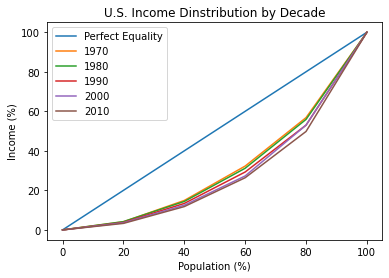

In [5]:
df = pd.read_table('us-income-data.txt')
df.head()

pop_data = df['Population (%)']
I_perfect = df['Income (%) Perfect Equality']
I_1970 = df['Income (%) 1970']
I_1980 = df['Income (%) 1980']
I_1990 = df['Income (%) 1990']
I_2000 = df['Income (%) 2000']
I_2010 = df['Income (%) 2010']

fig = plt.figure()
plt.title('U.S. Income Dinstribution by Decade')
plt.xlabel('Population (%)')
plt.ylabel('Income (%)')
plt.plot(pop_data,income_data_perfect, label='Perfect Equality')
plt.plot(pop_data,I_1970, label='1970')
plt.plot(pop_data,I_1980, label='1980')
plt.plot(pop_data,I_1990, label='1990')
plt.plot(pop_data,I_2000, label='2000')
plt.plot(pop_data,I_2010, label='2010')
plt.legend(loc='upper left')
plt.show()

The difference between the perfect equality Lorenz curve (straight line with slope=1, intercept=0) and the Lorenze curve for the U.S. is a measure of inequality of wealth distribution. The further the Lorenz curve from the straight line (with slope = 1), the more unequal the wealth distribution is. If you compare the decades from 1970 to 2010, the curve is getting further from the straight line, so wealth is becoming more unequally distributed in time. If you compare the 80th percent in population, for example, in 1970 they had 57% of the income. In 2010, they had 50% of the income. The upper 20% is gaining a larger and larger percentage of the income. Relatively to the rest of the population, the rich are getting richer

## Exercise 3

We are going to create sample economies from mathematical functions. Suppose the percentage income as a function of percentage population I(P) is given by the following functions:

Economy | Income (%) as a function of population (%)
--- | :---: 
Country A | $I = 100\left(\frac{P}{100}\right)^2$
Country B | $I = 100\left(\frac{P}{100}\right)^4$
Country C | $I = 100\left(\frac{P}{100}\right)^8$
Country D | $I = 100\left(\frac{P}{100}\right)^{16}$

A perfectly equal economy is $I=P$, which is a straight line with slope=1 and intercept=0.

1. On the same graph, plot the Lorenz curve for all four countries and the perfectly equal economy. Include a legend.
4. Which country has the greatest inequality?
5. Gottheil says, "It is possible to make strong arguments for both income equality and income inequality. Income equality can be justified on the randomness of personal misfortune that leads to poverty, people’s preference to avoid poverty over any other possible distribution of income, and the notion that income equality generates the maximum total utility for society. Arguments for income inequality relate high incomes to high levels of effort. Also, income inequality is more conducive to rapid economic growth that will improve circumstances for the poor over time."

  In an earlier exercise, you saw that income distribution in the U.S. is becoming more disparate. What are the ethical considerations of this empirical observation? How should we respond?

<IPython.core.display.Javascript object>


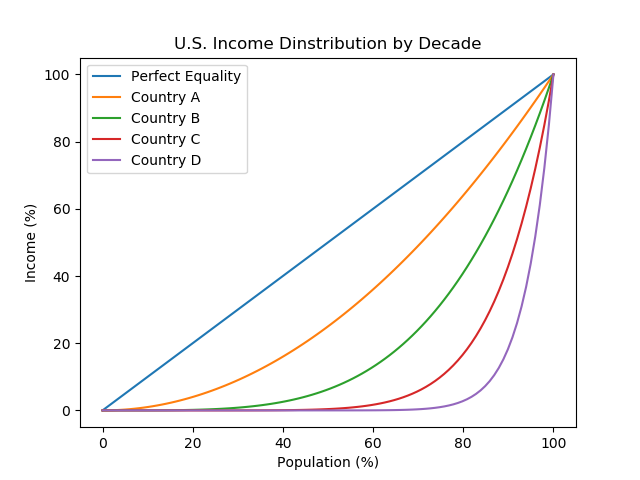

In [28]:
P = np.linspace(0,100,100)
I_perfect = P
I_A = 100*(P/100)**2
I_B = 100*(P/100)**4
I_C = 100*(P/100)**8
I_D = 100*(P/100)**16

fig = plt.figure()
plt.title('U.S. Income Dinstribution by Decade')
plt.xlabel('Population (%)')
plt.ylabel('Income (%)')
plt.plot(P,I_perfect, label='Perfect Equality')
plt.plot(P,I_A, label='Country A')
plt.plot(P,I_B, label='Country B')
plt.plot(P,I_C, label='Country C')
plt.plot(P,I_D, label='Country D')
plt.legend(loc='upper left')
plt.show()

Country D has the greatest income inequality because its Lorenz curve deviates the most from the straight line Lorenz curve.

Income could be equal because of forced work, like a labor camp. This would be ethically wrong. Income could be unequal, yet the society might truly give all people equal opportunity with absence of any prejudice. But variations in quality of work and time of work might produce unequal incomes. This would be ethically right in many ways. One can imagine situations where both equal and unequal income distributions could be ethically right or ethically wrong. The outcome is not what is ethical, rather the process that determines the outcome.

In the U.S. wealth distribution is becoming more unequal. Why? Are there systemic processes that favor the rich and powerful and create barriers for the poor? There is a strong case that these systemic processes and barriers do indeed exist. Housing laws (like single-family zoning) prevents the poor from buying housing close to urban centers. Quality of public education varies widely based on wealth. And race and gender prejudice and unequal pay persists in hiring. It is our responsibility to address these systemic barriers that prevent equal opportunity. Only when each person has the same "bootstaps" (in terms of education and health and opportunity) can we say that unequal wealth distribution is an acceptable result of individual freedom. We must fight for true freedom and justice. After that, unequal wealth distribution is an acceptable result of economic growth and individual achievement.